# Exercise 2.5

An example of a final project idea, inspired by one of your classmates.

In [32]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# File Path
file_path = 'https://tayweid.github.io/econ-0150/parts/part-2-5/data/'

## Presidential Elections

In [40]:
# Load Data
elections = pd.read_csv(file_path + 'Democratic_Share_Presidential_Wide.csv', index_col=0)
elections

,county_fips,2000,2004,2008,2012,2016,2020,2024
0,10001,0.486228,0.430514,0.549570,0.525066,0.474126,0.520705,0.510175
1,10003,0.618743,0.610978,0.705544,0.672871,0.655757,0.688198,0.665395
2,10005,0.462080,0.390371,0.456708,0.434067,0.385829,0.443133,0.444505
3,1001,0.291822,0.238448,0.259321,0.268006,0.246225,0.274423,0.266411
4,1003,0.255099,0.227490,0.240351,0.218190,0.202078,0.227317,0.206524
...,...,...,...,...,...,...,...,...
3195,9007,0.596565,0.572931,0.616795,0.580441,0.538528,0.582979,0.565321
3196,9009,0.616892,0.553791,0.617093,0.612802,0.563842,0.588161,0.560891
3197,9011,0.594871,0.569534,0.606672,0.592815,0.535329,0.581823,0.564170
3198,9013,0.575945,0.556122,0.605798,0.563854,0.529656,0.558951,0.540820


<Axes: xlabel='2016', ylabel='Count'>

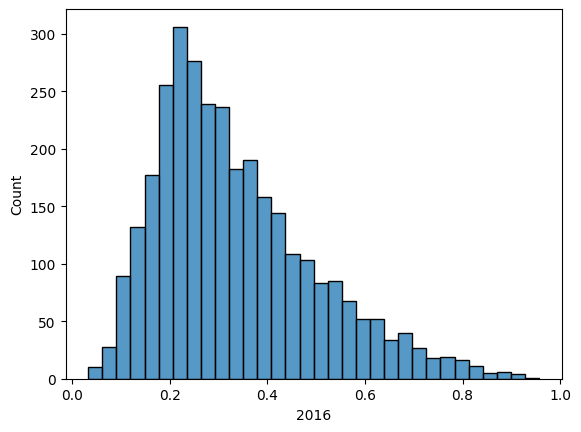

In [39]:
sns.histplot(elections, x='2016')

<Axes: xlabel='2020', ylabel='2024'>

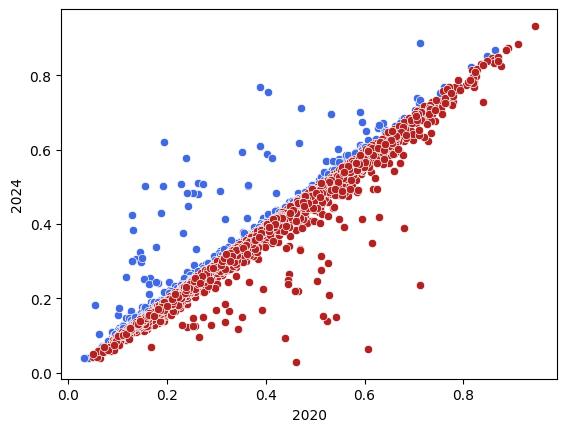

In [46]:
dem = elections[elections['2024'] > elections['2020']]
sns.scatterplot(dem, x='2020', y='2024', color='royalblue')
rep = elections[elections['2024'] < elections['2020']]
sns.scatterplot(rep, x='2020', y='2024', color='firebrick')

## Median Household Income

In [47]:
# Load Data
income = pd.read_csv(file_path + 'Income_By_County.csv', index_col=0)
income.head()

,State FIPS Code,County FIPS Code,Postal Code,Name,"Poverty Estimate, All Ages",90% CI Lower Bound,90% CI Upper Bound,"Poverty Percent, All Ages",90% CI Lower Bound.1,90% CI Upper Bound.1,...,Median Household Income,90% CI Lower Bound.6,90% CI Upper Bound.6,"Poverty Estimate, Age 0-4",90% CI Lower Bound.7,90% CI Upper Bound.7,"Poverty Percent, Age 0-4",90% CI Lower Bound.8,90% CI Upper Bound.8,county_fips
0,0,0,US,United States,"40,763,043","40,485,829","41,040,257",12.5,12.4,12.6,...,77719.0,"77,533","77,905","3,027,969","2,977,590","3,078,348",16.8,16.5,17.1,0
1,1,0,AL,Alabama,"780,043","762,230","797,856",15.7,15.3,16.1,...,62248.0,"61,546","62,950","66,457","61,943","70,971",23.2,21.6,24.8,1000
2,1,1,AL,Autauga County,"7,004","5,599","8,409",11.7,9.3,14.1,...,68857.0,"62,667","75,047",.,.,.,.,.,.,1001
3,1,3,AL,Baldwin County,"24,942","20,972","28,912",10,8.4,11.6,...,74248.0,"69,046","79,450",.,.,.,.,.,.,1003
4,1,5,AL,Barbour County,"5,585","4,266","6,904",25.5,19.5,31.5,...,45298.0,"40,531","50,065",.,.,.,.,.,.,1005


<Axes: >

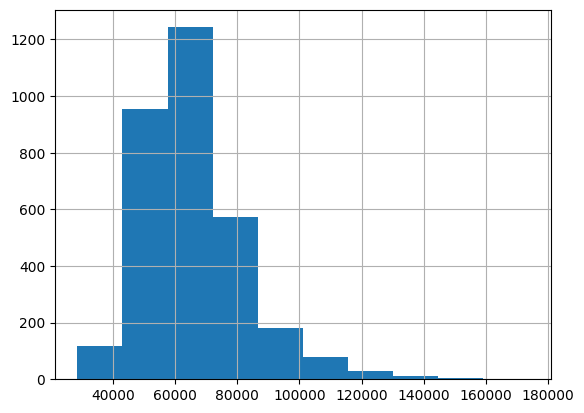

In [51]:
income['Median Household Income'].hist()

## Question 2: How is income related to election shift?

In [48]:
# Merge datasets on county FIPS
data = pd.merge(elections, income,
                  left_on='county_fips',
                  right_on='county_fips')

In [49]:
data.head()

,county_fips,2000,2004,2008,2012,2016,2020,2024,State FIPS Code,County FIPS Code,...,90% CI Upper Bound.5,Median Household Income,90% CI Lower Bound.6,90% CI Upper Bound.6,"Poverty Estimate, Age 0-4",90% CI Lower Bound.7,90% CI Upper Bound.7,"Poverty Percent, Age 0-4",90% CI Lower Bound.8,90% CI Upper Bound.8
0,10001,0.486228,0.430514,0.549570,0.525066,0.474126,0.520705,0.510175,10,1,...,19.8,72498.0,"67,331","77,665",.,.,.,.,.,.
1,10003,0.618743,0.610978,0.705544,0.672871,0.655757,0.688198,0.665395,10,3,...,16.1,86798.0,"83,802","89,794",.,.,.,.,.,.
2,10005,0.462080,0.390371,0.456708,0.434067,0.385829,0.443133,0.444505,10,5,...,20.1,78092.0,"74,172","82,012",.,.,.,.,.,.
3,1001,0.291822,0.238448,0.259321,0.268006,0.246225,0.274423,0.266411,1,1,...,21.2,68857.0,"62,667","75,047",.,.,.,.,.,.
4,1003,0.255099,0.227490,0.240351,0.218190,0.202078,0.227317,0.206524,1,3,...,16.1,74248.0,"69,046","79,450",.,.,.,.,.,.


In [58]:
data['dem_shift'] = data['2024'] - data['2012']

<Axes: xlabel='Median Household Income', ylabel='dem_shift'>

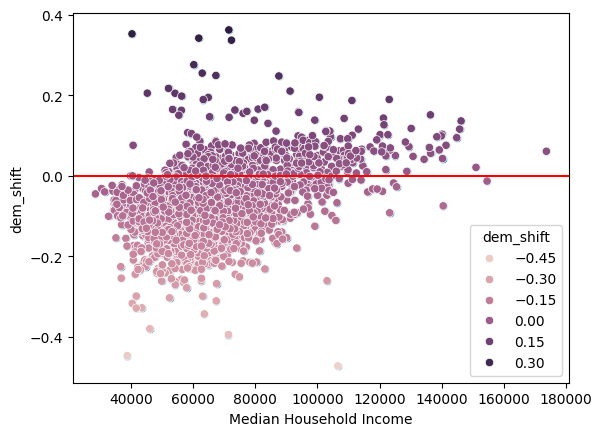

In [60]:
sns.scatterplot(data, x='Median Household Income', y='dem_shift')
# horizontal line at zero
plt.axhline(0, color='red')
sns.scatterplot(data, x='Median Household Income', y='dem_shift', hue='dem_shift')